# Ford GoBike System Data Exploration
#### by Fenny Tsai

## Introduction
- This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
- Bay Area Bike Share is a company that provides on-demand bike rentals for customers in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips under thirty minutes in length having no additional charge; longer trips will incur overtime fees.
- The source data (Ford GoBike System Data) is available at : https://www.fordgobike.com/system-data.


## Preliminary Wrangling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime, date

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
gobike=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
gobike_copy = gobike.copy()
gobike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
gobike_copy.shape

(183412, 16)

In [5]:
gobike_copy.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
gobike_copy.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [7]:
gobike_copy.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

> There are 183,412 data in the downloaded dataset with 16 columns as below:
- duration_sec
- start_time
- end_time
- start_station_id
- start_station_name
- start_station_latitude
- start_station_longitude
- end_station_id
- end_station_name
- end_station_latitude
- end_station_longitude
- bike_id
- user_type
- member_birth_year
- member_gender
- bike_share_for_all_trip


### What is/are the main feature(s) of interest in your dataset?

> 1. Which gender and which age uses the service the most?
2. Is the service mostly used by members or casual riders.
3. How long does the average trip take?
4. When does bikes are high in demand (during a day/during the week)?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. start_time, end_time
2. member_gender
3. user_type
4. duration_sec
5. member_birth_year

## Univariate Exploration


In [8]:
gobike_copy.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis=1, inplace=True)

In [9]:
gobike_copy['start_time'] = pd.to_datetime(gobike_copy['start_time'])
gobike_copy['end_time'] = pd.to_datetime(gobike_copy['end_time'])

In [10]:
gobike_copy['start_station_id'] = gobike_copy['start_station_id'].fillna(0).astype(int)
gobike_copy['end_station_id'] = gobike_copy['end_station_id'].fillna(0).astype(int)

In [11]:
gobike_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes


### Question 1 : What gender rides bikes the most?
### Visualization 1 :

In [12]:
gobike_copy.member_gender.isna().sum()

8265

In [13]:
gobike_copy['member_gender']= gobike_copy['member_gender'].fillna('Other')

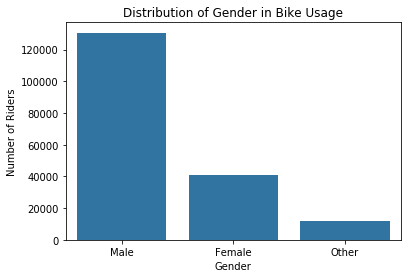

In [14]:
base_color = sb.color_palette()[0]
freq_gender = gobike_copy['member_gender'].value_counts()
sb.countplot(data=gobike_copy, x='member_gender', color=base_color, order=freq_gender.index)

plt.title('Distribution of Gender in Bike Usage')
plt.xlabel('Gender')
plt.ylabel('Number of Riders');

### Observation 1 :
> Male rides the bike more than gender Female and Other.

### Question 2 : What is most of the riders age?
### Visualization 2 : 

In [16]:
gobike_copy['age'] = 2019 - gobike_copy['member_birth_year']

In [17]:
df_age=gobike_copy[~gobike_copy.age.isna()].copy()
df_age['age']=df_age['age'].astype(int)

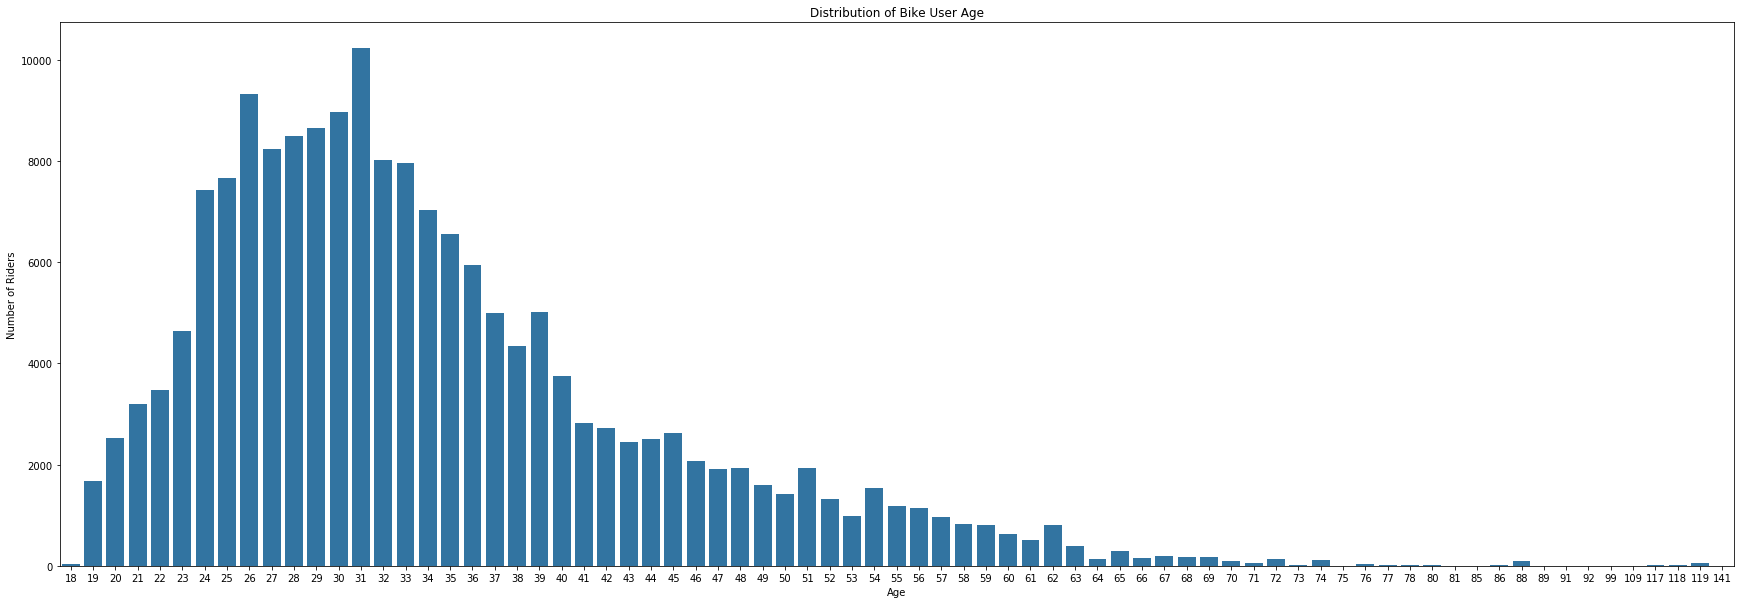

In [18]:
plt.figure(figsize=[30,10])
freq_age = df_age['age'].value_counts().sort_index()
sb.countplot(data=df_age, x='age', color=base_color, order=freq_age.index)

plt.title('Distribution of Bike User Age')
plt.xlabel('Age')
plt.ylabel('Number of Riders');

### Observation 2.1 :
> The ages are to dense to be show in the bar chart. Hence, we have to group the age: '20-29', '30-39', '40-49', '50-59', '60-69', '70+'. 

In [19]:
gobike_copy.age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [20]:
bins = [21, 30, 40, 50, 60, 70, 120]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
gobike_copy['age_range'] = pd.cut(gobike_copy.age, bins, labels = labels, include_lowest = True)

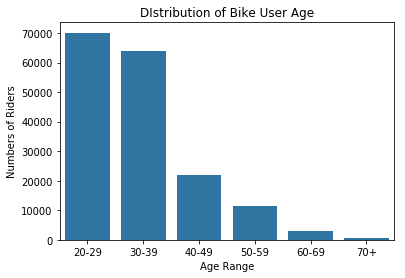

In [21]:
sb.countplot(data=gobike_copy, x='age_range', color=base_color)

plt.title('DIstribution of Bike User Age')
plt.xlabel("Age Range")
plt.ylabel("Numbers of Riders");


### Observation 2.2 :
> The bike user's age range from 20 to 39 uses the bike most.

### Question 3 : What user type(normal customers or subscriber) rides bikes the most?
### Observation 3:

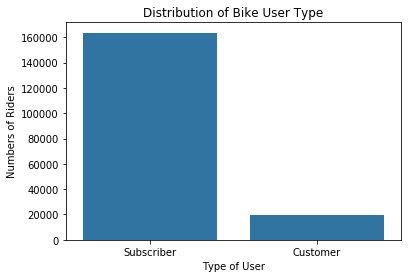

In [22]:
freq_usertype = gobike_copy['user_type'].value_counts()
sb.countplot(data=gobike_copy, x='user_type', color=base_color, order=freq_usertype.index)

plt.title('Distribution of Bike User Type')
plt.xlabel('Type of User')
plt.ylabel('Numbers of Riders');

### Observation 3 :
> It is obviuos that subscriber has much more usage on the bike.

### Question 4 : What is the duration of bike trips?
### Visulization 4 :

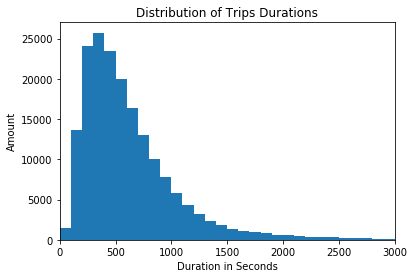

In [23]:
binedges = np.arange(0, gobike_copy['duration_sec'].max()+100,100)
plt.hist(data=gobike_copy, x='duration_sec', bins=binedges)
plt.xlim(0,3000)
plt.title('Distribution of Trips Durations')
plt.xlabel('Duration in Seconds')
plt.ylabel('Amount');

### Observation 4.1 :
> From the plot, it shows that most of the bike usage duration is less than 1000 seconds.

> However, the figure is right-skewed. Therefore, bin edges should be widen to 100. Also, for easier understanding, we can change the duration unit from seconds to minutes.

In [24]:
np.log10(gobike_copy.duration_sec).describe(np.arange(0,1,0.1))

count    183412.000000
mean          2.712606
std           0.309396
min           1.785330
0%            1.785330
10%           2.330414
20%           2.462398
30.0%         2.556303
40%           2.637490
50%           2.710963
60.0%         2.783904
70%           2.859138
80%           2.946943
90%           3.071145
max           4.931682
Name: duration_sec, dtype: float64

In [25]:
gobike_copy['duration_min'] = gobike_copy['duration_sec'] / 60
gobike_copy.drop('duration_sec', axis=1, inplace=True)

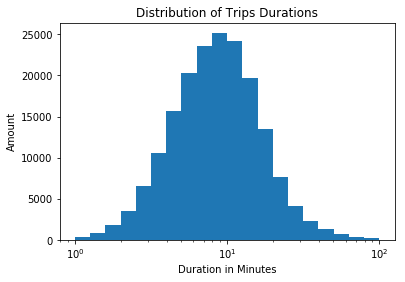

In [26]:
binedges = 10**np.arange(0, 2+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30]
labels = ['{}'.format(x) for x in ticks]

plt.hist(data=gobike_copy, x='duration_min', bins=binedges)
plt.xticks(ticks, labels)
plt.title('Distribution of Trips Durations')
plt.xlabel('Duration in Minutes')
plt.ylabel('Amount')
plt.xscale('log')

In [27]:
gobike_copy.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,age_range,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,35.0,30-39,869.750000
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,NaN,Other,No,NaN,NaN,708.683333
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,47.0,40-49,1030.900000
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,30.0,20-29,608.166667
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,45.0,40-49,26.416667


### Observation 4.2 : 
> In the revised plot, the figure is normally distributed , and there is a tendancy of a short duration of using the bike.

### Question 5 : When in a day does riders use the bike most?
### Visualization 5 :

In [28]:
gobike_copy['period'] = (gobike_copy['start_time'].dt.hour % 24 + 4) // 4
gobike_copy['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [29]:
period_of_day = ['Early Morning','Morning', 'Noon', 'Evening','Night', 'Late Night']
periodofday = pd.api.types.CategoricalDtype(ordered=True, categories=period_of_day)
gobike_copy['period'] = gobike_copy['period'].astype(periodofday);

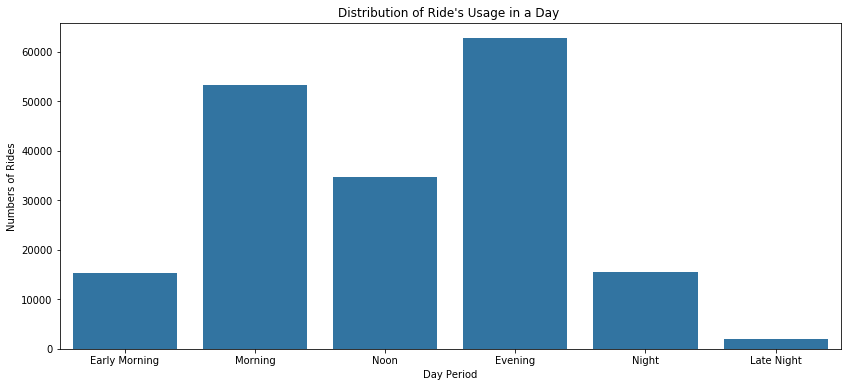

In [30]:
plt.figure(figsize=[14,6])
sb.countplot(data=gobike_copy, x='period', color=base_color)

plt.title('Distribution of Ride\'s Usage in a Day ')
plt.xlabel('Day Period')
plt.ylabel('Numbers of Rides');

### Observation 5 :
> Most of the riders uses the bike in the evening, then morning.

### Question 6 : Do riders use the bike most in week day or weekend?
### Visualization 6 :


In [31]:
gobike_copy['date'] = gobike_copy['start_time'].dt.normalize()
gobike_copy['day_of_week'] = gobike_copy['date'].dt.weekday_name

In [32]:
day_of_week = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
dayofweek = pd.api.types.CategoricalDtype(ordered=True, categories=day_of_week)
gobike_copy['day_of_week'] = gobike_copy['day_of_week'].astype(dayofweek);

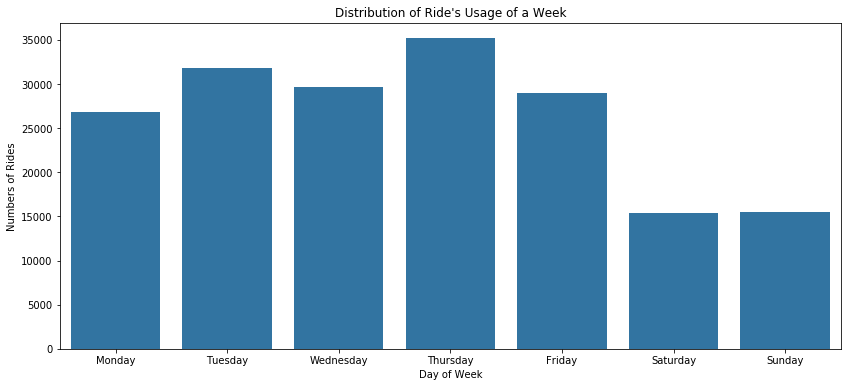

In [33]:
plt.figure(figsize=[14,6])
sb.countplot(data=gobike_copy, x='day_of_week', color=base_color)

plt.title('Distribution of Ride\'s Usage of a Week')
plt.xlabel('Day of Week')
plt.ylabel('Numbers of Rides');

### Observation 6 :
> The bikes are be mostly used in week days than weekend.

### Question 7 : What is the top 20 start station of the bike usage?
### Visualization 7 :


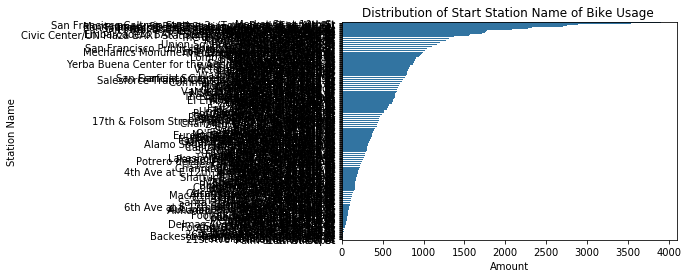

In [34]:
start_station_name_counts = gobike_copy.start_station_name.value_counts()
start_station_name_counts_order = start_station_name_counts.index 

sb.countplot(data=gobike_copy, y='start_station_name', color=base_color, order = start_station_name_counts_order);
plt.title('Distribution of Start Station Name of Bike Usage ')
plt.xlabel('Amount')
plt.ylabel('Station Name');

In [35]:
station_count = pd.DataFrame(gobike_copy.groupby('start_station_name')['duration_min'].count())
station_count = station_count.reset_index()
station_count.rename(columns={'duration_min' : 'trip_count'}, inplace=True)
station_count.sort_values(by=['trip_count'], ascending=False, inplace=True)

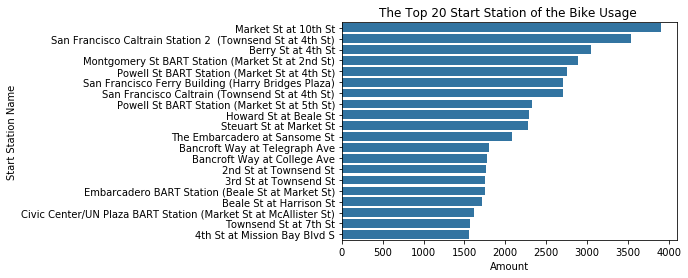

In [36]:
station_count_20 = station_count.head(20)
sb.barplot(data=station_count_20, x='trip_count', y='start_station_name', color=base_color)
plt.title('The Top 20 Start Station of the Bike Usage ')
plt.xlabel('Amount')
plt.ylabel('Start Station Name');

### Observation 7 :
> The top 5 start station by riders are Market St at 10th St,  San Francisco Caltrain Station 2 (Townsend St at 4th St), Berry St at 4th St	, Montgomery St BART Station (Market St at 2nd St), Powell St BART Station (Market St at 4th St).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In question 4: What is the duration of bike trips? I make the unit of the duration from seconds to minutes and also drop the "duration_sec" column while creating a new column called "duration_min".

> In question 5: When in a day does riders use the bike most? In the dataset only indicates the start time of the bike usage. I created a new column call "period" which records the period timing of a day that riders used the bike.

> In question 6: When does riders use the bike most in week day or weekend? I create a new column call "day_of_week" to store the value of the day of a week. In order to differentiate the usage in week days and weekend.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In question 2: What is the age range for most of the riders? If I plot the hitogram by using the age, the figure will become too dense. So I grouped the age range ('20-29', '30-39', '40-49', '50-59', '60-69', '70+') to make the plot easier to read.

> In question 4: What is the duration of bike trips? The figure is right-skewed. Hence, I adjust the bin edges widen to 100. And plot the histogram in log.  

> In question 7: There are too many stations to fit in the histogram, hence I recreate a new dataframe storing only the count of start_station_name. Then, plot it to a bar chart.

## Bivariate Exploration

### Question 8 : What is the correlation between gender and age range?
### Visualization 8 : 

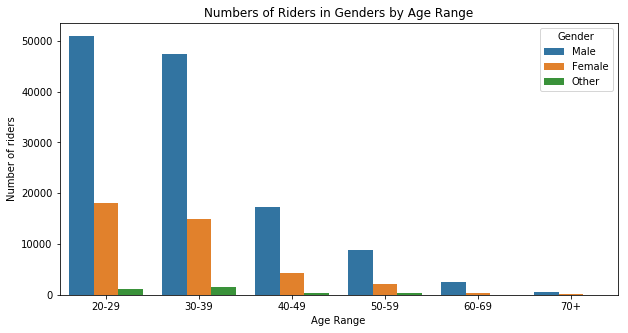

In [37]:
plt.figure(figsize=[10,5])
sb.countplot(data=gobike_copy, x='age_range', hue='member_gender', hue_order=['Male', 'Female', 'Other'])
plt.title('Numbers of Riders in Genders by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of riders')
plt.legend(title='Gender');

### Observation 8 :
> In the age range 30-39, both male, female, and other genders has the highest usage of the bike.

### Question 9 : What is the correlation between gender and user type?
### Visualization 9: 

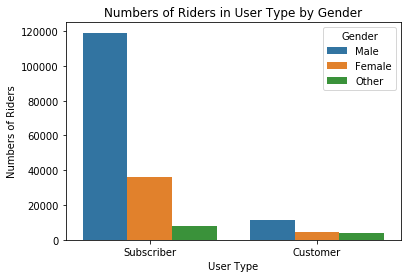

In [38]:
sb.countplot(data=gobike_copy, x='user_type', hue='member_gender', hue_order=['Male', 'Female', 'Other'], order=['Subscriber','Customer'])
plt.title('Numbers of Riders in User Type by Gender')
plt.xlabel('User Type')
plt.ylabel('Numbers of Riders')
plt.legend(title='Gender');

### Observation 9 :
> In both user type: Subscribers and Customers, male has a hight number in using the bike.

### Question 10 : What is the correlation between age and user type?
### Visualization 10 : 

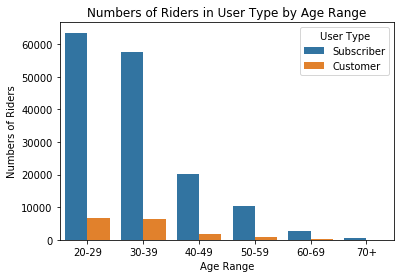

In [39]:
sb.countplot(data=gobike_copy, x='age_range', hue='user_type', hue_order=['Subscriber', 'Customer'])
plt.title('Numbers of Riders in User Type by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Numbers of Riders')
plt.legend(title='User Type');

### Observation 10 :
> Most of the subscribers are in the age 30 to 39 regardless of user type.

### Question  11 : What is the correlation between age range and the duration of usage?
### Visualization 11 : 

In [40]:
gobike_copy.duration_min.describe()

count    183412.000000
mean         12.101307
std          29.906496
min           1.016667
25%           5.416667
50%           8.566667
75%          13.266667
max        1424.066667
Name: duration_min, dtype: float64

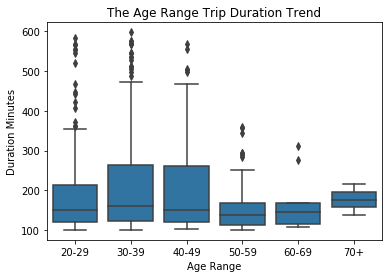

In [41]:
duration_min_above100 = gobike_copy.query('duration_min > 100 and duration_min < 600')
sb.boxplot(data=duration_min_above100, x='age_range', y='duration_min', color=base_color)
plt.title('The Age Range Trip Duration Trend')
plt.xlabel('Age Range')
plt.ylabel('Duration Minutes');

### Observation 11 :
> Most of the riders use the bike between 100 to 300 minutes. Also, riders in age range from 40 to 49 use the bike slightly longer than other age range riders.

### Question 12 : What is the correlation between gender and the duration of usage?
### Visualization 12  : 

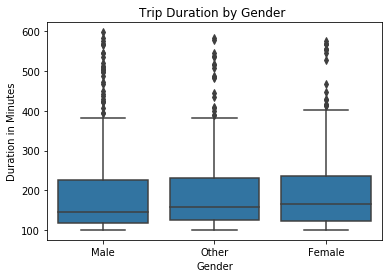

In [42]:
sb.boxplot(data=duration_min_above100, x='member_gender', y='duration_min', color=base_color)
plt.title('Trip Duration by Gender ')
plt.xlabel('Gender')
plt.ylabel('Duration in Minutes');

### Observation 12 :
> It appears from the visualization that gender does not really affect duration.

### Question 13 : What is the correlation between duration usage and the bike using timing in a day?
### Visualization 13 :

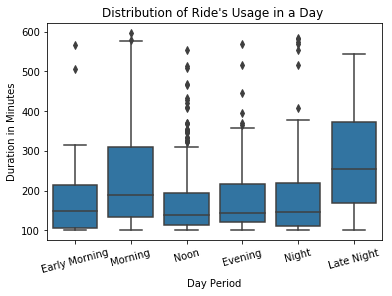

In [43]:
sb.boxplot(data=duration_min_above100, x='period', y='duration_min',color=base_color)

plt.title('Distribution of Ride\'s Usage in a Day ')
plt.xticks(rotation=15)
plt.xlabel('Day Period')
plt.ylabel('Duration in Minutes');

### Observation 13 :
> Morning and Late Night has a higher duration of using the bike.

### Question 14 : What is the correlation between duration usage and the bike using timing in a week?
### Visualization 14 :

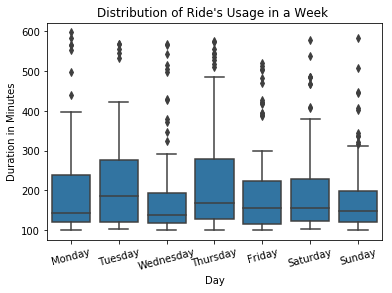

In [44]:
sb.boxplot(data=duration_min_above100, x='day_of_week', y='duration_min',color=base_color)

plt.title('Distribution of Ride\'s Usage in a Week ')
plt.xticks(rotation=15)
plt.xlabel('Day')
plt.ylabel('Duration in Minutes');

### Observation 14 :
> It seems that the duration of bike usage in Tuesday anf Thursday are slightly higher than other days in a week.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the observation in Bivariate Exploration, gender has not much affecting the duration of using the bike. Age from 20-29 and 30-39 are the majority of riders. However, age 40-49 has a longer timing when using the bike. It might because teenagers only use bike for going to school or work and older age group uses bikes for a leisure purpose.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In the correlation between duration bike usage in a day, Morning and Late Night has a higher duration of usage. It is possible that in the morning, students and workers(age 20-39 are the majority of riders) use bike to avoid traffic jams. Also, during late night, there might be no more public transport, therefore the duration of using bike is much more higher than other timings.

## Multivariate Exploration

### Question 15 : What is the correlation between membership, duration usage and the bike using timing in a week? 
### Visualization 15 :

In [45]:
def myscatterplot(df, xVar, yVar, hueVar, order=None, palette='CMRmap' ):
    plt.figure(figsize = [14,6])
    sb.stripplot(data=df, x=xVar, y=yVar, hue=hueVar,
             jitter=0.35, dodge=True, size=4, palette=palette)
    xVar=xVar.replace("_", " ")
    yVar=yVar.replace("_", " ")
    hueVar=hueVar.replace("_", " ")
    plt.title(f'Relationship between {yVar} and {xVar}, By {hueVar}'.title(), fontsize=14, weight='bold')
    plt.xlabel(xVar.title(),fontsize=10, weight='bold')
    plt.ylabel(yVar.title(),fontsize=10, weight='bold')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
              title=hueVar.title());


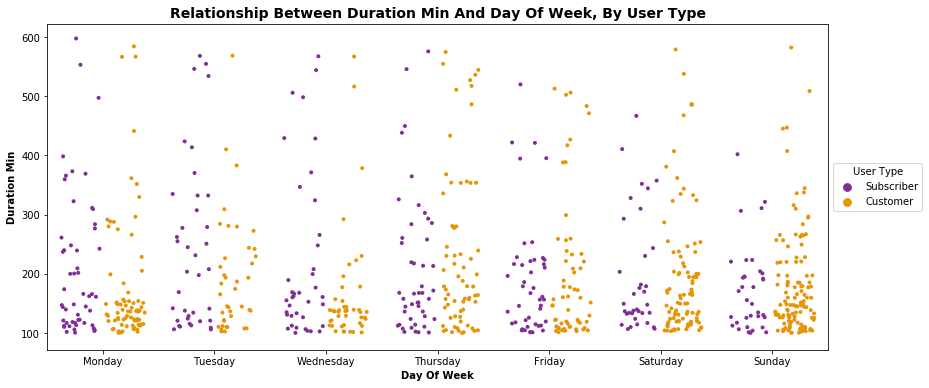

In [46]:
myscatterplot(duration_min_above100, 'day_of_week', 'duration_min', 'user_type', order=day_of_week )

### Observation 15 :
> From the scatter plot, Subscribers have a tendency to rent out the bikes for longer trips, weekly spanning over 300 minutes. Also, Customers uses the bike more during weekends.

### Question 16 : What is the correlation between age range, membership, duration usage?
### Visualization 16 :

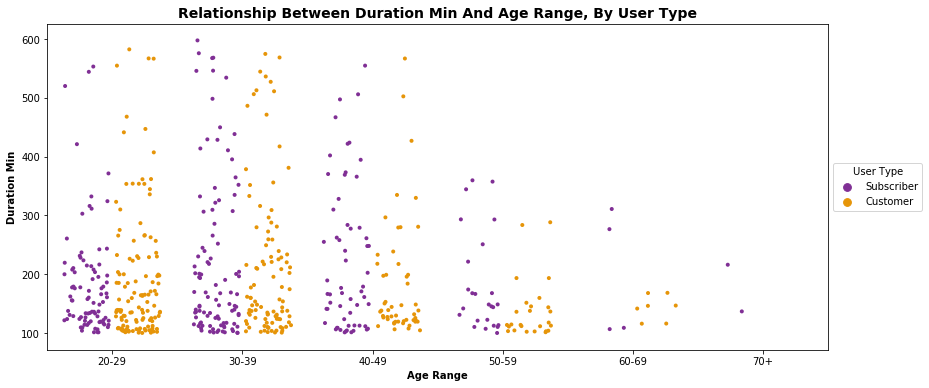

In [47]:
myscatterplot(duration_min_above100, 'age_range', 'duration_min', 'user_type', order=day_of_week )

### Observation 16 :
> In age range 30-39 and below, customers has more users than subscribers, and customers also use the bike in a longer period in this age range. On the other hand, age range above 40, there are more subscribers than customers and subscribers use the bike in a longer period.

### Question 17 : What is the correlation between time in a day, membership, duration usage?
### Visualization 17 :

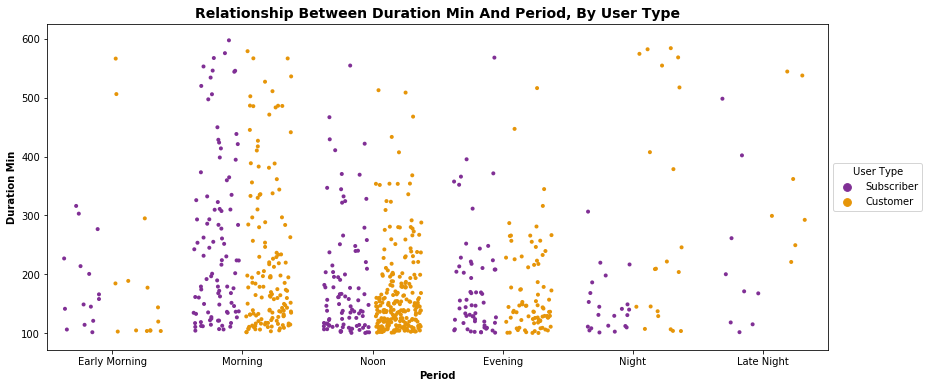

In [48]:
myscatterplot(duration_min_above100, 'period', 'duration_min', 'user_type', order=day_of_week )

### Observation 17 :
> Most of the rides are completed during morning and noon. It is interesting that riders use a short period of time during noon.

### Question 18 : What is the correlation between age range, duration usage and the bike using timing in a week? 
### Visualization 18 :

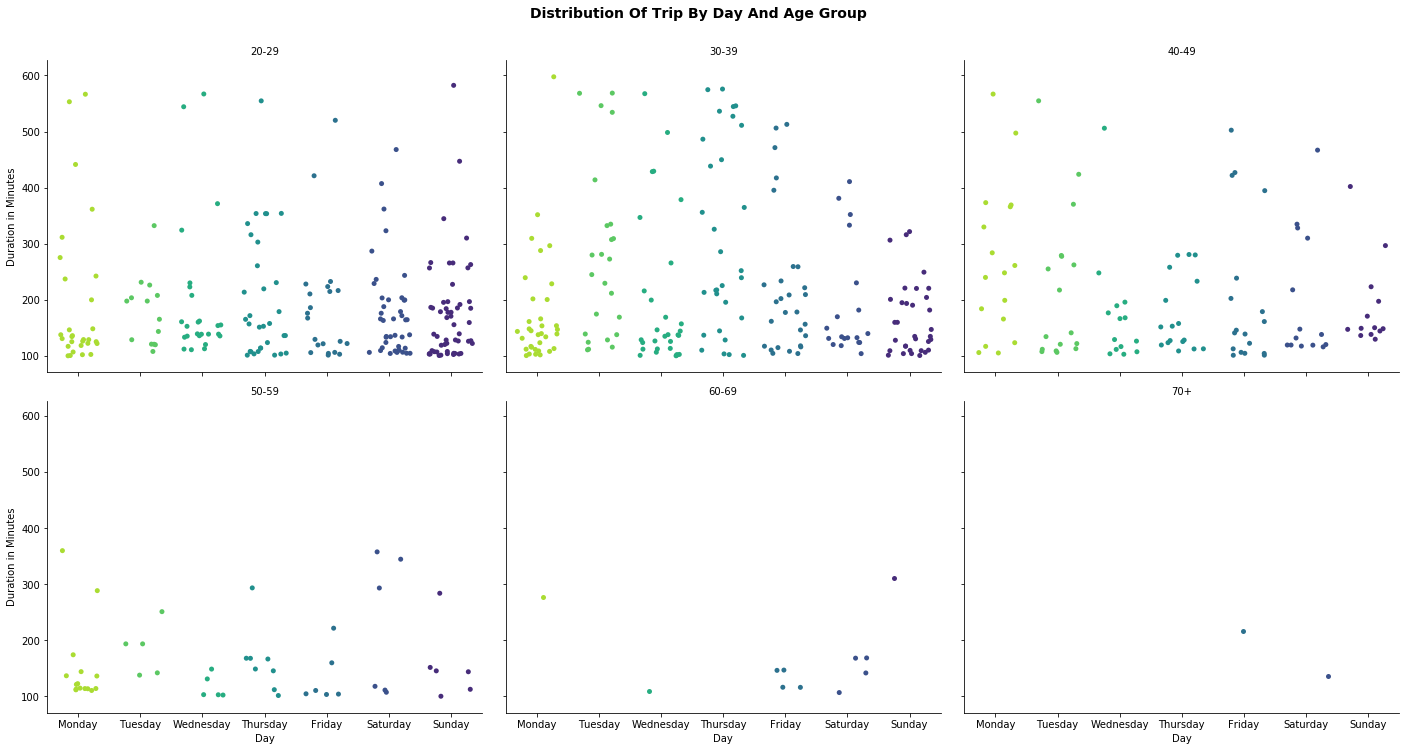

In [49]:
g = sb.FacetGrid(data=duration_min_above100, col='age_range', size=5, col_wrap=3, margin_titles = True )
g.map(sb.stripplot, 'day_of_week', 'duration_min', jitter=0.35, dodge=True, size=5, palette="viridis_r");

g.set_titles("{col_name}") 
g.set_axis_labels(x_var="Day", y_var="Duration in Minutes")
for axes in g.axes.flat:
        axes.set_xticklabels(axes.get_xticklabels(), fontsize=10)
plt.suptitle('Distribution of Trip by Day and Age Group'.title(), y=1.04, fontsize=14, weight='bold')
g.fig.set_size_inches(20, 10);

### Observation 18 :
> It is obvious that riders age below 49 has a longer duration in using the bike. Riders in age range in 40-49 uses bike more in week days. Elderlies with age above 60 tends to use bike in weekends.

### Question 19 : What is the correlation between age range, duration usage and gender?
### Visualization 19 :

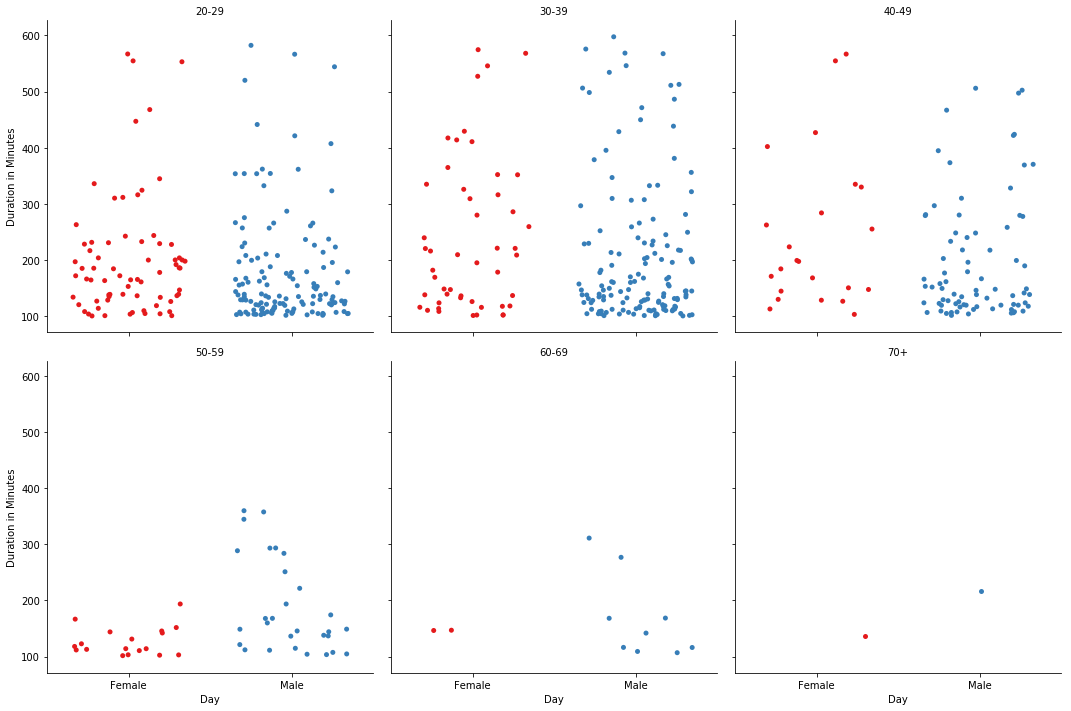

In [50]:
gender_order=['Female', 'Male']
g = sb.FacetGrid(data=duration_min_above100, col='age_range', size=5, col_wrap=3, margin_titles = True )
g.map(sb.stripplot, 'member_gender', 'duration_min', jitter=0.35, dodge=True, size=5, palette='Set1', order=gender_order);

g.set_titles("{col_name}") 
g.set_axis_labels(x_var="Day", y_var="Duration in Minutes");

### Observation 19 :
> Overall male uses the bike in a longer period of time than female in each age range. Nevertheless, bith male and female above 50 years old tends to use the bike in a shorter timing.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - Overall, Subscribers use the bike in a longer period than Customers. 
- There is a higher amount of using bike during weekend by Customers.
- Riders in the age range 30-39 use the bike in a longer period in both user type. However, in other age range, subscribers use the bike in a longer duration.
- Riders use the bike in a short period of time during noon.
- Male tends to use the bike in a longer duration regardless of age range.

### Were there any interesting or surprising interactions between features?

> Most of the users are in the age range 30-39 and most of them are not subscribe to the bike system. Also, weekend has a higher amount of usage by Customers.

## Conclusions
> Most of the riders are Male, in the age range of 30-39.and over 80% of the riders are subscribed to the bike system. Late night and morning has a higher amount of riders. Genders has not much difference in the duration of using the bike. However, age range is the main features for trip duration. 
Subscribers tend to use the bike during week days and customers use the bike more on weekends.
Therefore, in order to draw those customers to subscribe with the bike system, the bike company can roll out an weekend subscribtion promotion.